# A Simple Method for Melodic Analysis and Classification

Sorbonne Universités / Universités Pierre et Marie Curie et Paris Sorbonne

June 10-11-12, 2015 Paris, France

# Introduction : Aims and general approach

* To « analyse » and classify a big number of melodies
* Analysis from audio files (no symbolic data)
* A classification based on the scale proximity
* Toward an unsupervised approach (not a template-match approch)
* A simple method ?
* A Python Module : Diastema (https://github.com/AnasGhrab/diastema)

# Step 1 : Fondamental frequency (f0) detection

* Praat
* PitchYinFFT (Essentia)
* PredominantMelody (Essentia)

In [46]:
%matplotlib inline
from diastema import *
path = "/Users/anas/AUDIO/quatre_chants/"
Kchants = Melodies(path,xmin=250,xmax=400,transpose="Yes")

Lecture et analyse de  4  fichiers (.txt) dans le dossier : /Users/anas/AUDIO/quatre_chants/


# Step 2 : Frequency Density Estimation

* The main notes of the melody correspond to a high density of the frequencies. These can be represented by a Probability Density Function (PDF)
* A way to estimate PDF is using a Kernel Density Estimation (Gaussian Kernels : http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.gaussian_kde.html)

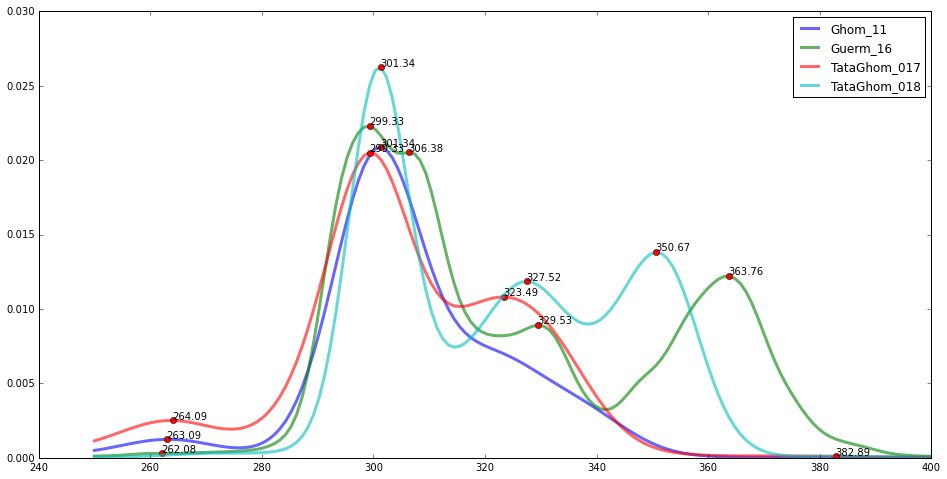

In [47]:
plt.figure(figsize=(16,8))
Kchants.PdfsPlot(allplots="Yes",gpdf="No")

# Step 3 : Tonic detection and transposition

* Extract the last frequencies (0.5%, 1%, 1.5%)
* The tonic can be :
    * the most present frequency : _mode()_
    * The most probable frequency : KDE->PDF

In [48]:
Kchants.AllTonics([0.5,1,1.5,2,5],method="pdf")

Toniques possibles de la Phrase 0  :  [250, 250, 250, 250, 250]
Toniques possibles de la Phrase 1  :  [323, 323, 323, 323, 324]
Toniques possibles de la Phrase 2  :  [250, 250, 250, 250, 399]
Toniques possibles de la Phrase 3  :  [399, 250, 250, 250, 250]


In [49]:
Kchants.AllTonics([0.5,1,1.5,2,5],method="mode")

Toniques possibles de la Phrase 0  :  [682.514, 682.514, 686.468, 686.468, 686.468]
Toniques possibles de la Phrase 1  :  [323.968, 323.968, 323.968, 323.968, 323.968]
Toniques possibles de la Phrase 2  :  [806.976, 806.976, 806.976, 806.976, 811.651]
Toniques possibles de la Phrase 3  :  [859.915, 859.915, 859.915, 859.915, 859.915]


# Step 4 : Correlation / Distances

In [50]:
data_dist = Kchants.PdfCorr()
data_link = linkage(data_dist) # computing the linkage

# Step 5 Hierarchical Clustering

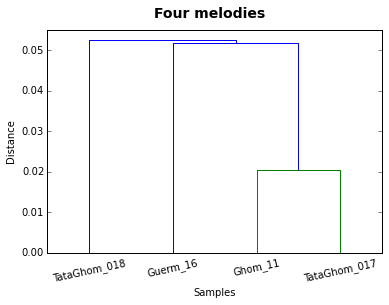

In [51]:
dendrogram(data_link,labels=Kchants.file_names)
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.suptitle('Four melodies', fontweight='bold', fontsize=14);

# Step 6 : Similarity matrix / Heatmap

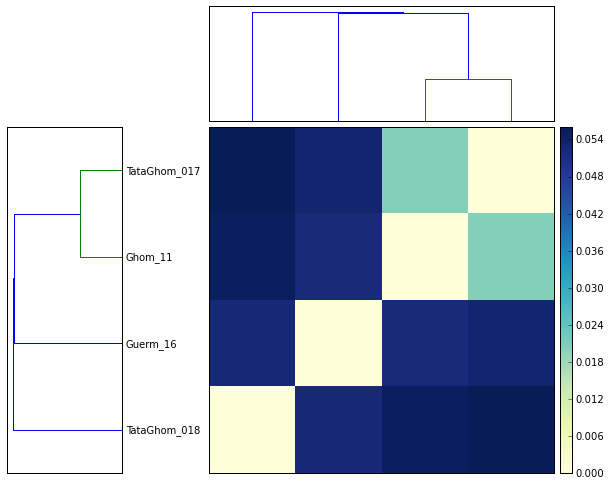

In [52]:
# As explained here : http://nbviewer.ipython.org/github/OxanaSachenkova/hclust-python/blob/master/hclust.ipynb
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='single')
Z1 = dendrogram(Y, orientation='right',labels=Kchants.file_names) # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.4,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.4,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([1.01,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)

# Toward a clustering of traditional woman songs in Tunisia (309 songs)

In [53]:
path = "/Users/anas/AUDIO/Chants_femmes/"
Chants = Melodies(path)

Lecture et analyse de  309  fichiers (.txt) dans le dossier : /Users/anas/AUDIO/Chants_femmes/


[]

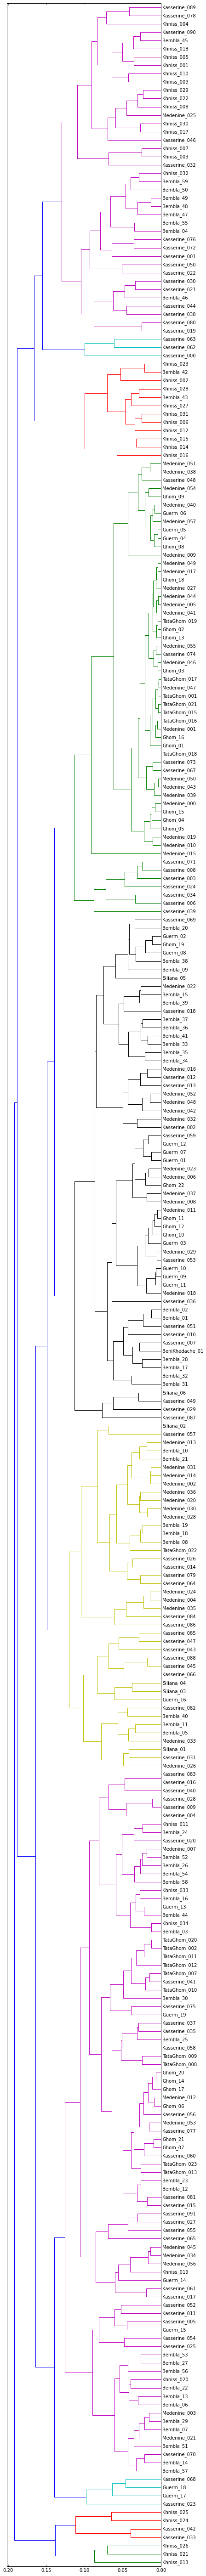

In [60]:
# As explained here : http://nbviewer.ipython.org/github/OxanaSachenkova/hclust-python/blob/master/hclust.ipynb
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(6,100))
# x ywidth height
#ax1 = fig.add_axes([1,1,3,3])
Y = linkage(Chants.PdfCorr(),method='complete')
Z1 = dendrogram(Y, orientation='right',labels=Chants.file_names) # adding/removing the axes
ax1.set_xticks([])

# Links

* Diastema : Diastema (https://github.com/AnasGhrab/diastema)
* Heatmap with Python : http://nbviewer.ipython.org/github/OxanaSachenkova/hclust-python/blob/master/hclust.ipynb
* Extract Cluster Elements by Color in Python Dendrograms : http://nxn.se/post/90198924975/extract-cluster-elements-by-color-in-python
* http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html